In [329]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [330]:
orders = pd.read_csv('olist_orders_dataset.csv')
payment = pd.read_csv('olist_order_payments_dataset.csv')
items = pd.read_csv('olist_order_items_dataset.csv')
customers = pd.read_csv('olist_customers_dataset.csv')

In [331]:
orders.head(3)

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00


In [332]:
payment.head(3)

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71


In [333]:
items.head(3)

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.9,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.9,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.0,17.87


In [334]:
customers.head(3)

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP


In [335]:
date_cols = ['order_purchase_timestamp',
             'order_delivered_customer_date',
             'order_estimated_delivery_date'
    ]

for col  in date_cols:
    orders[col] = pd.to_datetime(orders[col])

In [336]:
# creating column for late delivery
orders.dropna(subset=[
    "order_delivered_customer_date",
    "order_estimated_delivery_date"
])

orders['Late'] = (orders['order_estimated_delivery_date']  < orders['order_delivered_customer_date']).astype(int)

In [337]:
orders.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,Late
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,0
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,0
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04,0
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15,0
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26,0


In [338]:
items_agg = items.groupby('order_id').agg(
    total_item = ('order_item_id', 'count'),
    total_price=("price", "sum"),
    total_freight=("freight_value", "sum"),
    avg_item_price=("price", "mean")
).reset_index()

In [339]:
orders = orders.merge(items_agg, on='order_id', how='left')

In [340]:
orders.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,Late,total_item,total_price,total_freight,avg_item_price
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,0,1.0,29.99,8.72,29.99
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,0,1.0,118.70,22.76,118.70
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04,0,1.0,159.90,19.22,159.90
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15,0,1.0,45.00,27.20,45.00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26,0,1.0,19.90,8.72,19.90


In [341]:
payment.head(3)

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71


In [342]:
payment_agg = payment.groupby('order_id').agg(
        payment_value = ('payment_value', 'sum'),
        payment_installments = ('payment_installments', 'max'),
        payment_type=("payment_type", lambda x: x.mode()[0])
).reset_index()

In [343]:
orders = orders.merge(payment_agg, on='order_id', how='left')

In [344]:
orders.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,Late,total_item,total_price,total_freight,avg_item_price,payment_value,payment_installments,payment_type
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,0,1.0,29.99,8.72,29.99,38.71,1.0,voucher
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,0,1.0,118.70,22.76,118.70,141.46,1.0,boleto
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04,0,1.0,159.90,19.22,159.90,179.12,3.0,credit_card
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15,0,1.0,45.00,27.20,45.00,72.20,1.0,credit_card
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26,0,1.0,19.90,8.72,19.90,28.62,1.0,credit_card


In [345]:
orders = orders.merge(
    customers[["customer_id", "customer_city", "customer_state"]],
    on="customer_id",
    how="left"
)

In [346]:
orders.head(3)

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,Late,total_item,total_price,total_freight,avg_item_price,payment_value,payment_installments,payment_type,customer_city,customer_state
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,0,1.0,29.99,8.72,29.99,38.71,1.0,voucher,sao paulo,SP
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,0,1.0,118.70,22.76,118.70,141.46,1.0,boleto,barreiras,BA
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04,0,1.0,159.90,19.22,159.90,179.12,3.0,credit_card,vianopolis,GO


In [347]:
orders.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,Late,total_item,total_price,total_freight,avg_item_price,payment_value,payment_installments,payment_type,customer_city,customer_state
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,0,1.0,29.99,8.72,29.99,38.71,1.0,voucher,sao paulo,SP
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,0,1.0,118.70,22.76,118.70,141.46,1.0,boleto,barreiras,BA
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04,0,1.0,159.90,19.22,159.90,179.12,3.0,credit_card,vianopolis,GO
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15,0,1.0,45.00,27.20,45.00,72.20,1.0,credit_card,sao goncalo do amarante,RN
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26,0,1.0,19.90,8.72,19.90,28.62,1.0,credit_card,santo andre,SP


In [348]:
orders.shape

(99441, 18)

In [349]:
orders.isnull().sum().sort_values(ascending=False)

order_delivered_customer_date    2965
order_delivered_carrier_date     1783
total_freight                     775
avg_item_price                    775
total_item                        775
total_price                       775
order_approved_at                 160
payment_type                        1
payment_installments                1
payment_value                       1
customer_id                         0
order_id                            0
order_purchase_timestamp            0
order_status                        0
Late                                0
order_estimated_delivery_date       0
customer_city                       0
customer_state                      0
dtype: int64

In [350]:
orders.duplicated().sum()

np.int64(0)

In [351]:
round(orders['Late'].value_counts() / len(orders['Late']),5)*100

Late
0    92.129
1     7.871
Name: count, dtype: float64

In [352]:
orders['order_purchase_timestamp'].min()

Timestamp('2016-09-04 21:15:19')

In [353]:
orders['order_purchase_timestamp'].max()

Timestamp('2018-10-17 17:30:18')

In [354]:
orders = orders.dropna(subset=[
    "total_freight",
    "avg_item_price",
    "total_item",
    "total_price"
])

In [355]:
orders = orders.drop(columns=["order_approved_at"])

In [356]:
orders = orders.drop(columns=["order_delivered_carrier_date"])

In [357]:
orders = orders.dropna(subset=[
    "payment_value",
    "payment_installments",
    "payment_type"
])


In [358]:
orders.isnull().sum()

order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_delivered_customer_date    2190
order_estimated_delivery_date       0
Late                                0
total_item                          0
total_price                         0
total_freight                       0
avg_item_price                      0
payment_value                       0
payment_installments                0
payment_type                        0
customer_city                       0
customer_state                      0
dtype: int64

In [359]:
orders.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_delivered_customer_date,order_estimated_delivery_date,Late,total_item,total_price,total_freight,avg_item_price,payment_value,payment_installments,payment_type,customer_city,customer_state
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-10 21:25:13,2017-10-18,0,1.0,29.99,8.72,29.99,38.71,1.0,voucher,sao paulo,SP
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-08-07 15:27:45,2018-08-13,0,1.0,118.70,22.76,118.70,141.46,1.0,boleto,barreiras,BA
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-17 18:06:29,2018-09-04,0,1.0,159.90,19.22,159.90,179.12,3.0,credit_card,vianopolis,GO
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-12-02 00:28:42,2017-12-15,0,1.0,45.00,27.20,45.00,72.20,1.0,credit_card,sao goncalo do amarante,RN
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-16 18:17:02,2018-02-26,0,1.0,19.90,8.72,19.90,28.62,1.0,credit_card,santo andre,SP


In [360]:
orders.to_csv('BR_EC_OLIST.csv', index=False)

In [361]:
orders["purchase_month"] = orders["order_purchase_timestamp"].dt.month
orders["purchase_weekday"] = orders["order_purchase_timestamp"].dt.weekday
orders['purchse hour'] = orders['order_purchase_timestamp'].dt.hour
orders["is_weekend"] = (orders["purchase_weekday"] >= 5).astype(int)

In [362]:
orders['is_weekend'].value_counts()

is_weekend
0    75964
1    22701
Name: count, dtype: int64

In [363]:
orders.shape

(98665, 20)

In [364]:
orders['expected delivery'] = (orders['order_estimated_delivery_date'] - orders['order_purchase_timestamp']).dt.days

In [365]:
orders.head(3)

,order_id,customer_id,order_status,order_purchase_timestamp,order_delivered_customer_date,order_estimated_delivery_date,Late,total_item,total_price,total_freight,...,payment_value,payment_installments,payment_type,customer_city,customer_state,purchase_month,purchase_weekday,purchse hour,is_weekend,expected delivery
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-10 21:25:13,2017-10-18,0,1.0,29.99,8.72,...,38.71,1.0,voucher,sao paulo,SP,10,0,10,0,15
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-08-07 15:27:45,2018-08-13,0,1.0,118.70,22.76,...,141.46,1.0,boleto,barreiras,BA,7,1,20,0,19
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-17 18:06:29,2018-09-04,0,1.0,159.90,19.22,...,179.12,3.0,credit_card,vianopolis,GO,8,2,8,0,26


In [366]:
# to handle zero and right skewd data in total_price/ totale freight

orders['log_price'] = np.log1p(orders['total_price'])
orders['log_freight'] = np.log1p(orders['total_freight'])

In [367]:
def func(x):
    return x.min(), x.max()

In [368]:
print(func(orders['log_freight']))
print(func(orders['log_price']))

(0.0, 7.493294976899205)
(0.6151856390902334, 9.506065016071148)


In [369]:
orders['freigth to price ratio'] = orders['total_freight'] / orders['total_price']
orders['price per item'] =orders['total_price'] / orders['total_item']

In [370]:
orders.head(3)

,order_id,customer_id,order_status,order_purchase_timestamp,order_delivered_customer_date,order_estimated_delivery_date,Late,total_item,total_price,total_freight,...,customer_state,purchase_month,purchase_weekday,purchse hour,is_weekend,expected delivery,log_price,log_freight,freigth to price ratio,price per item
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-10 21:25:13,2017-10-18,0,1.0,29.99,8.72,...,SP,10,0,10,0,15,3.433665,2.274186,0.290764,29.99
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-08-07 15:27:45,2018-08-13,0,1.0,118.70,22.76,...,BA,7,1,20,0,19,4.784989,3.168003,0.191744,118.70
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-17 18:06:29,2018-09-04,0,1.0,159.90,19.22,...,GO,8,2,8,0,26,5.080783,3.006672,0.120200,159.90


In [371]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
Index: 98665 entries, 0 to 99440
Data columns (total 25 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   order_id                       98665 non-null  object        
 1   customer_id                    98665 non-null  object        
 2   order_status                   98665 non-null  object        
 3   order_purchase_timestamp       98665 non-null  datetime64[ns]
 4   order_delivered_customer_date  96475 non-null  datetime64[ns]
 5   order_estimated_delivery_date  98665 non-null  datetime64[ns]
 6   Late                           98665 non-null  int64         
 7   total_item                     98665 non-null  float64       
 8   total_price                    98665 non-null  float64       
 9   total_freight                  98665 non-null  float64       
 10  avg_item_price                 98665 non-null  float64       
 11  payment_value       

In [372]:
orders = orders.drop(columns=['order_id', 'customer_id', 'order_status', 'order_purchase_timestamp', 'order_delivered_customer_date', 'order_estimated_delivery_date', 'avg_item_price', 'total_price', 'total_freight', 'payment_value', 'expected delivery', 'is_weekend', 'customer_city'])

In [373]:
orders.head(3)

,Late,total_item,payment_installments,payment_type,customer_state,purchase_month,purchase_weekday,purchse hour,log_price,log_freight,freigth to price ratio,price per item
0,0,1.0,1.0,voucher,SP,10,0,10,3.433665,2.274186,0.290764,29.99
1,0,1.0,1.0,boleto,BA,7,1,20,4.784989,3.168003,0.191744,118.70
2,0,1.0,3.0,credit_card,GO,8,2,8,5.080783,3.006672,0.120200,159.90


In [374]:
orders.shape

(98665, 12)

In [375]:
orders.isna().sum().sort_values(ascending=False)

Late                      0
total_item                0
payment_installments      0
payment_type              0
customer_state            0
purchase_month            0
purchase_weekday          0
purchse hour              0
log_price                 0
log_freight               0
freigth to price ratio    0
price per item            0
dtype: int64

In [376]:
orders["Late"].value_counts(normalize=True)

Late
0    0.920681
1    0.079319
Name: proportion, dtype: float64

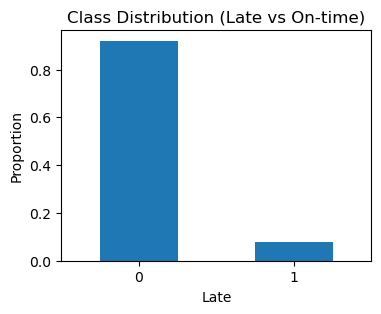

In [377]:
import matplotlib.pyplot as plt

counts = orders['Late'].value_counts(normalize=True)

plt.figure(figsize=(4,3))
counts.plot(kind='bar')
plt.title('Class Distribution (Late vs On-time)')
plt.ylabel('Proportion')
plt.xticks(rotation=0)
plt.show()

C:\Users\shyam\AppData\Local\Temp\ipykernel_7192\552988908.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  late_rate = orders.groupby('ratio_bin')['Late'].mean()


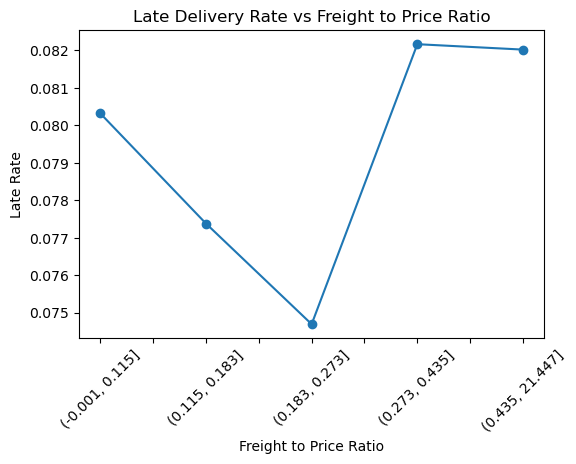

In [378]:
import pandas as pd

orders['ratio_bin'] = pd.qcut(orders['freigth to price ratio'], q=5)

late_rate = orders.groupby('ratio_bin')['Late'].mean()

plt.figure(figsize=(6,4))
late_rate.plot(marker='o')
plt.title('Late Delivery Rate vs Freight to Price Ratio')
plt.ylabel('Late Rate')
plt.xlabel('Freight to Price Ratio')
plt.xticks(rotation=45)
plt.show()

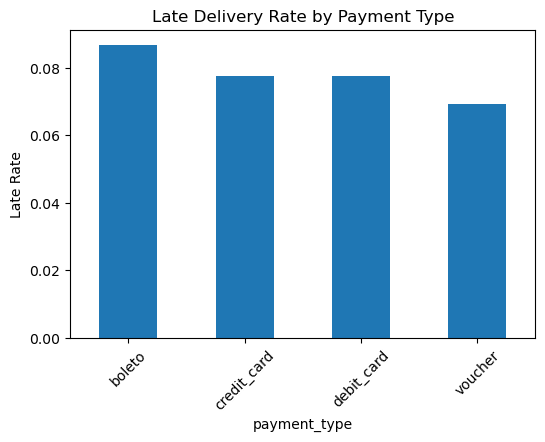

In [379]:
payment_late = orders.groupby('payment_type')['Late'].mean().sort_values(ascending=False)

plt.figure(figsize=(6,4))
payment_late.plot(kind='bar')
plt.title('Late Delivery Rate by Payment Type')
plt.ylabel('Late Rate')
plt.xticks(rotation=45)
plt.show()

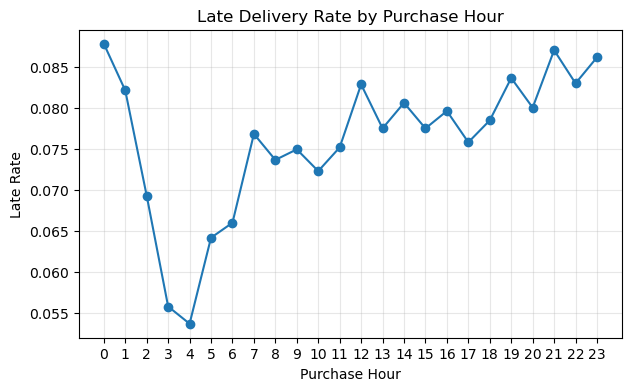

In [380]:
hour_late = orders.groupby('purchse hour')['Late'].mean()

import matplotlib.pyplot as plt

plt.figure(figsize=(7,4))
plt.plot(hour_late.index, hour_late.values, marker='o')
plt.xlabel('Purchase Hour')
plt.ylabel('Late Rate')
plt.title('Late Delivery Rate by Purchase Hour')
plt.xticks(range(0,24))
plt.grid(alpha=0.3)
plt.show()

In [381]:
orders.dtypes

Late                         int64
total_item                 float64
payment_installments       float64
payment_type                object
customer_state              object
purchase_month               int32
purchase_weekday             int32
purchse hour                 int32
log_price                  float64
log_freight                float64
freigth to price ratio     float64
price per item             float64
ratio_bin                 category
dtype: object

In [382]:
orders.columns = (
    orders.columns
    .str.strip()
    .str.lower()
    .str.replace(" ", "_")
)

In [383]:
orders.rename(columns={
    "purchse_weekday": "purchase_weekday",
    "purchse_hour": "purchase_hour",
    "freigth_to_price_ratio": "freight_to_price_ratio"
}, inplace=True)

In [384]:
print(orders.columns.tolist())

['late', 'total_item', 'payment_installments', 'payment_type', 'customer_state', 'purchase_month', 'purchase_weekday', 'purchase_hour', 'log_price', 'log_freight', 'freight_to_price_ratio', 'price_per_item', 'ratio_bin']


In [385]:
orders.head()

,late,total_item,payment_installments,payment_type,customer_state,purchase_month,purchase_weekday,purchase_hour,log_price,log_freight,freight_to_price_ratio,price_per_item,ratio_bin
0,0,1.0,1.0,voucher,SP,10,0,10,3.433665,2.274186,0.290764,29.99,"(0.273, 0.435]"
1,0,1.0,1.0,boleto,BA,7,1,20,4.784989,3.168003,0.191744,118.70,"(0.183, 0.273]"
2,0,1.0,3.0,credit_card,GO,8,2,8,5.080783,3.006672,0.120200,159.90,"(0.115, 0.183]"
3,0,1.0,1.0,credit_card,RN,11,5,19,3.828641,3.339322,0.604444,45.00,"(0.435, 21.447]"
4,0,1.0,1.0,credit_card,SP,2,1,21,3.039749,2.274186,0.438191,19.90,"(0.435, 21.447]"


In [386]:
X = orders.drop(columns=['late'])
y = orders['late']

In [387]:
num_features = [
    "total_item",
    "log_price",
    "log_freight",
    "freight_to_price_ratio",
    "price_per_item",
    "payment_installments",
    "purchase_month",
    "purchase_weekday",
    "purchase_hour"
]

In [388]:
cat_features = [
    "payment_type",
    "customer_state"
]

In [389]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, stratify=y, random_state=42)

In [390]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder

In [391]:
preprocessor = ColumnTransformer(
    transformers=[
            ('num', StandardScaler(), num_features),
            ('cat', OneHotEncoder(handle_unknown='ignore', sparse_output=False), cat_features)
    ]
)

In [392]:
X_train

,total_item,payment_installments,payment_type,customer_state,purchase_month,purchase_weekday,purchase_hour,log_price,log_freight,freight_to_price_ratio,price_per_item,ratio_bin
1236,1.0,6.0,credit_card,RJ,7,1,10,3.749975,3.196221,0.564547,41.52,"(0.435, 21.447]"
23207,1.0,6.0,credit_card,SP,7,5,19,5.010635,2.712042,0.094362,149.00,"(-0.001, 0.115]"
21241,1.0,6.0,credit_card,RS,1,1,16,4.671894,2.862201,0.155807,105.90,"(0.115, 0.183]"
49010,4.0,3.0,credit_card,RJ,7,2,19,4.887337,4.308380,0.557143,32.90,"(0.435, 21.447]"
12523,2.0,8.0,credit_card,MG,2,4,23,4.777441,3.772761,0.360781,58.90,"(0.273, 0.435]"
...,...,...,...,...,...,...,...,...,...,...,...,...
8810,1.0,10.0,credit_card,SC,5,6,21,5.707110,3.031099,0.065733,300.00,"(-0.001, 0.115]"
79511,1.0,1.0,credit_card,MG,5,2,11,3.951051,2.956991,0.357717,50.99,"(0.273, 0.435]"
83954,2.0,1.0,boleto,SP,7,1,11,4.744758,3.365916,0.245306,56.99,"(0.183, 0.273]"
64720,1.0,1.0,boleto,RJ,3,1,9,4.094345,3.177637,0.389661,59.00,"(0.273, 0.435]"


In [393]:
y_train

1236     0
23207    0
21241    0
49010    0
12523    0
        ..
8810     0
79511    0
83954    0
64720    0
76665    0
Name: late, Length: 78932, dtype: int64

In [394]:
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression

In [395]:
model1 = Pipeline(
    steps=[
        ('preprocessor', preprocessor),
        ('clf1', LogisticRegression(max_iter=1000, class_weight='balanced'))
    ]
)

In [396]:
model1.fit(X_train, y_train)

,steps,"[('preprocessor', ...), ('clf1', ...)]"
,transform_input,None
,memory,None
,verbose,False
,transformers,"[('num', ...), ('cat', ...)]"
,remainder,'drop'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True


In [397]:
from sklearn.metrics import classification_report, roc_auc_score   

In [398]:
y_pred = model1.predict(X_test)
y_proba = model1.predict_proba(X_test)[:, 1]

# print(y_proba)
print('Classification Report:\n ',classification_report(y_test, y_pred))
print("ROC AUC:", roc_auc_score(y_test, y_proba))
# 0 - ontime
# 1 - late

Classification Report:
                precision    recall  f1-score   support

           0       0.94      0.68      0.79     18168
           1       0.12      0.49      0.19      1565

    accuracy                           0.66     19733
   macro avg       0.53      0.58      0.49     19733
weighted avg       0.87      0.66      0.74     19733

ROC AUC: 0.6076910496705932


In [399]:
import xgboost as xgb

xgb_pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('xgb', xgb.XGBClassifier(n_estiators = 500,
                              learning_rate = 0.05,
                              max_depth = 5,
                              subsample = 0.8,
                              eval_metrics = 'auc',
                              random_state = 42,
                              n_jobs = -1
    ))
])

In [400]:
xgb_pipeline.fit(X_train, y_train)

c:\Users\shyam\miniconda3\envs\ml\lib\site-packages\xgboost\training.py:199: UserWarning: [22:10:16] WARNING: D:\bld\xgboost-split_1768313916136\work\src\learner.cc:790: 
Parameters: { "eval_metrics", "n_estiators" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


,steps,"[('preprocessor', ...), ('xgb', ...)]"
,transform_input,None
,memory,None
,verbose,False
,transformers,"[('num', ...), ('cat', ...)]"
,remainder,'drop'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True


In [401]:
y_pred_proba_xgb = xgb_pipeline.predict_proba(X_test)[:,1]
roc_auc_xgb = roc_auc_score(y_test, y_pred_proba_xgb)

print(f"XGBoost ROC AUC: {roc_auc_xgb:.4f}")

XGBoost ROC AUC: 0.7254


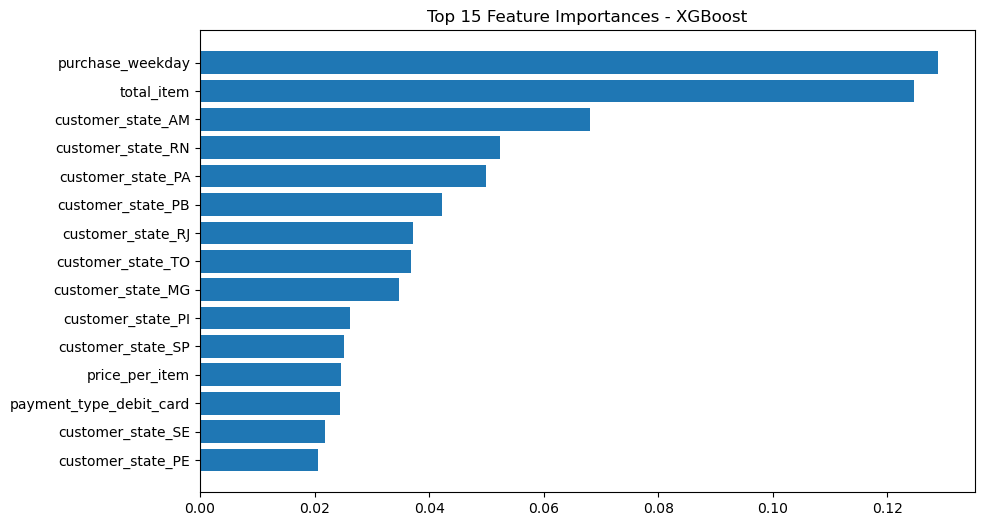

In [402]:
# feature importance(top 15)
import matplotlib.pyplot as plt
import pandas as pd

ohe_features = xgb_pipeline.named_steps['preprocessor'].named_transformers_['cat'].get_feature_names_out(cat_features)
all_features = list(ohe_features) + num_features

importances = xgb_pipeline.named_steps['xgb'].feature_importances_
fi_df = pd.DataFrame({'feature': all_features, 'importance': importances}).sort_values(by='importance', ascending=False)

plt.figure(figsize=(10,6))
plt.barh(fi_df['feature'][:15][::-1], fi_df['importance'][:15][::-1])
plt.title("Top 15 Feature Importances - XGBoost")
plt.show()


In [403]:
new_order = {
    'total_item': 3,
    'log_price': 7.5,
    'log_freight': 3.0,
    'freight_to_price_ratio': 0.05,
    'price_per_item': 100.0,
    'payment_installments': 2,
    'purchase_month': 5,
    'purchase_weekday': 2,
    'purchase_hour': 15,
    'payment_type': 'credit_card',
    'customer_state': 'SP'
}

new_df = pd.DataFrame([new_order])

In [404]:
# Predict probability of Late
prob_late = xgb_pipeline.predict_proba(new_df)[:,1][0]
print(f"Probability of being Late: {prob_late:.2f}")

Probability of being Late: 0.05


In [405]:
# Final PRediction
pred_class = xgb_pipeline.predict(new_df)[0]
print("Prediction (Late = 1, On-time = 0):", pred_class)

Prediction (Late = 1, On-time = 0): 0
